<a href="https://colab.research.google.com/github/DR721/fibonacci/blob/main/Drawing_from_uniform_distribution_puzzle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def simulate_game(optimal_stopping_value, output=False):
    total = 0.0
    draws = 0

    while True:
        next_draw = random.uniform(0, 1)

        # Optimal stopping strategy: stop if total is greater than input optimal
        if total >= optimal_stopping_value:
          if output==True:
            print(f"Stopping at draw {draws + 1}, total sum: {total:.4f}")
          break

        # Check if adding the next draw would exceed 1
        elif total + next_draw > 1:
          total = 0
          if output==True:
            print(f"Draw {draws + 1}: {next_draw:.4f} (sum exceeds 1)")
          break

        # Add the draw to the total
        else:
          total += next_draw
          draws += 1
          if output==True:
            print(f"Draw {draws}: {next_draw:.4f}, running total: {total:.4f}")

    return total

# Running the simulation
final_sum = simulate_game(0.8, True)
print(f"Final sum: {final_sum:.4f}")

Draw 1: 0.0493, running total: 0.0493
Draw 2: 0.8458, running total: 0.8951
Stopping at draw 3, total sum: 0.8951
Final sum: 0.8951


In [119]:
optimal_stopping_value_arun = 0.414
optimal_stopping_value_est = 2-np.exp(1)/2

def test_optimals(n):
  total_arun = 0
  total_est = 0
  for i in range(n):
    total_arun += simulate_game(optimal_stopping_value_arun)
    total_est += simulate_game(optimal_stopping_value_est)
  print(f"Arun's average {total_arun/n}, Diana's average: {total_est/n}")
  if total_arun > total_est:
    print("Arun has a higher total!")
  else:
    print("Estimated value has a higher total!")

In [120]:
test_optimals(100)

Arun's average 0.6264043743881061, Diana's average: 0.5435293264140781
Arun has a higher total!


In [121]:
def bar_chart(vals, runs):
  tst_vals = np.arange(0,vals+1)
  averages = np.zeros(vals+1)
  for i in tst_vals:
      total = 0
      for j in range(runs):
        total += simulate_game(i/vals)
      averages[int(i)] = total/runs

  # Define the polynomial function
  def fit_func(x, a, b, c, d, e):
    return a*x**4 + b*x**3 + c*x**2 + d*x + e

  params = curve_fit(fit_func, tst_vals[1:-2], averages[1:-2])
  a,b,c,d,e = params[0]
  fit_y = fit_func(tst_vals, a, b, c, d, e)
  plt.figure(figsize=[15,6])

  # Create bar chart
  plt.bar(tst_vals, averages, tick_label=[int(i) for i in tst_vals*1000/vals])
  plt.plot(tst_vals, fit_y, 'orange')

  # Add title and labels
  plt.title('Puzzle Expectations per Stopping Value')
  plt.xlabel('stopping value')
  plt.ylabel('averages')
  plt.tick_params(axis='both', which='both', labelsize=6)
  plt.grid(zorder=-1.0)

  # Show the plot
  plt.show()

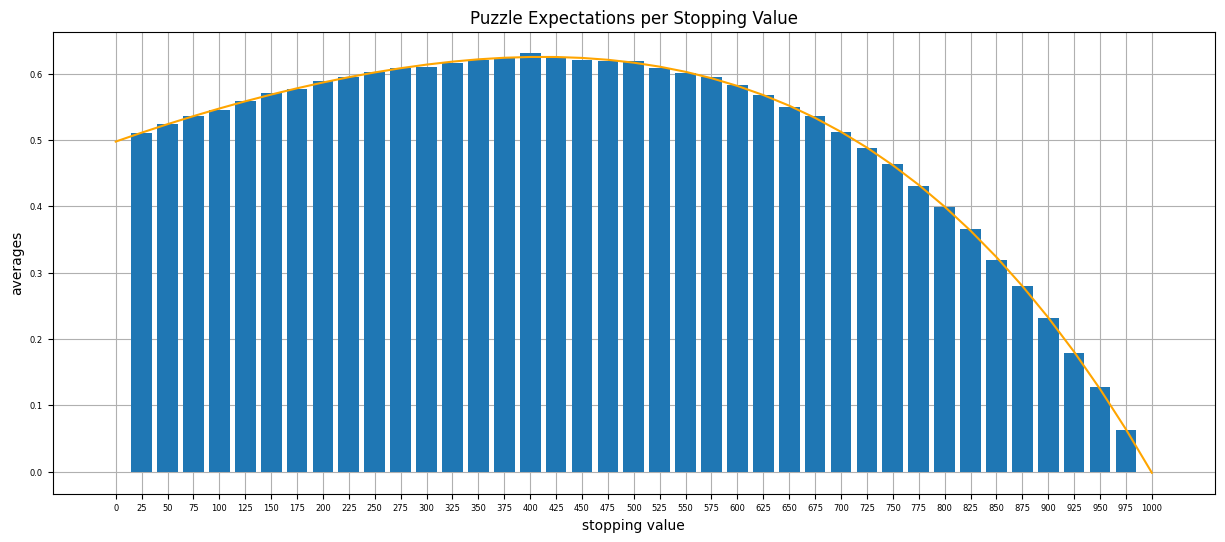

In [122]:
bar_chart(40, 10000)

In [123]:
def simulate_game(S, num_trials=20000):
    rewards = []
    for _ in range(num_trials):
        total = 0
        while total <= S:
            total += np.random.uniform(0, 1)
            if total > 1:
                rewards.append(0)
                break
        else:
            rewards.append(total)
    return np.mean(rewards)

# Simulate for different values of S
S_values = np.linspace(0, 1, 100)
expected_rewards = [simulate_game(S) for S in S_values]

# Find the optimal S
optimal_S = S_values[np.argmax(expected_rewards)]
optimal_reward = max(expected_rewards)

optimal_S, optimal_reward


(0.4040404040404041, 0.6284555717810563)